In [8]:
!pip install scikit-learn nltk pandas datasets py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.5 MB/s eta 0:00:00


In [9]:
import nltk
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
# Function to count the number of words in a string
def count_words(text):
    if isinstance(text, str):  # Ensure text is a string
        tokens = nltk.word_tokenize(text)
        return len(tokens)
    else:
        return 0  # Return 0 if text is not a valid string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
import os
import pandas as pd
from datasets import load_dataset

def preprocess_data(data_link, output_dir, splits, attr):
    # Load dataset
    dataset = data_link

    # Save the dataset as CSV
    for split in splits:
        df = pd.DataFrame(dataset[split])

        #Null values
        print(f'\n\t{split}\nNull Values:')
        print(df.isnull().sum())

        #Stats
        print('\nStatistics:\n')
        print(df[attr[0]].apply(len).describe() , '\n')
        print(df[attr[1]].apply(len).describe())

        #Histogram
        plt.hist(df[attr[0]].apply(len), bins=100)
        plt.xlabel("Text length")
        plt.ylabel("Frequency")
        plt.title("Text")
        plt.show()

        plt.hist(df[attr[0]].apply(len), bins=100)
        plt.xlabel("Summary length")
        plt.ylabel("Frequency")
        plt.title("Summary")
        plt.show()

        df.to_csv(os.path.join(output_dir, f'{split}.csv'), index=False)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/datasets/load.py:1491: FutureWarning: The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(



	train
Null Values:
id          0
dialogue    0
summary     0
dtype: int64

Statistics:

count    14732.000000
mean       511.183614
std        402.621436
min          0.000000
25%        216.000000
50%        401.000000
75%        694.000000
max       5492.000000
Name: dialogue, dtype: float64 

count    14732.000000
mean       110.134673
std         60.892471
min          3.000000
25%         63.000000
50%         96.000000
75%        144.000000
max        300.000000
Name: summary, dtype: float64


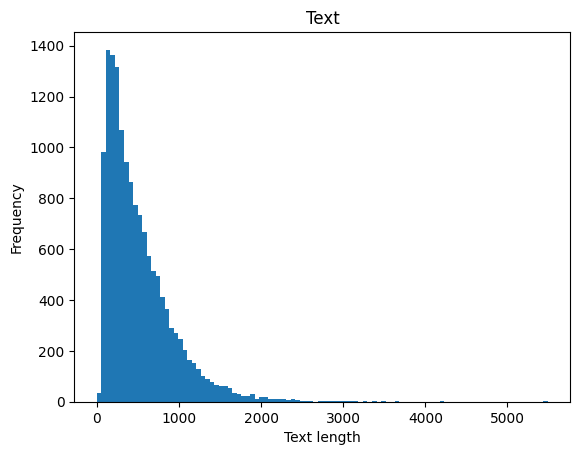

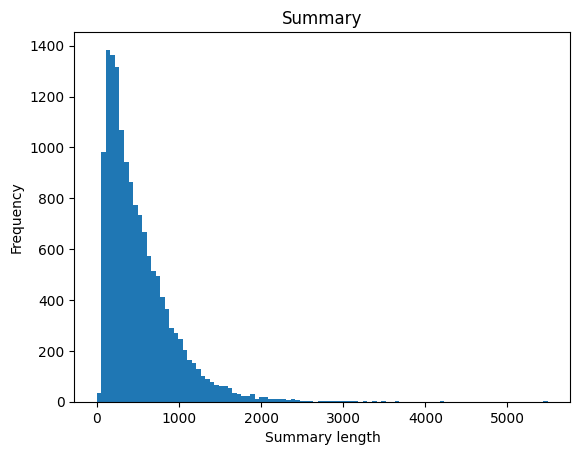


	validation
Null Values:
id          0
dialogue    0
summary     0
dtype: int64

Statistics:

count     818.000000
mean      499.396088
std       403.632584
min        57.000000
25%       208.000000
50%       385.500000
75%       688.000000
max      2950.000000
Name: dialogue, dtype: float64 

count    818.000000
mean     110.174817
std       61.388822
min       17.000000
25%       63.000000
50%       96.000000
75%      144.000000
max      300.000000
Name: summary, dtype: float64


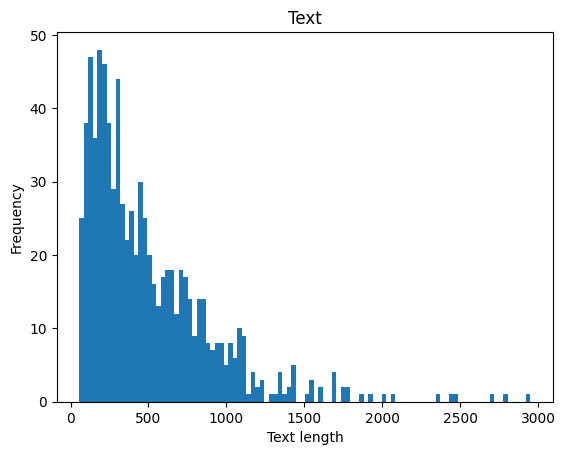

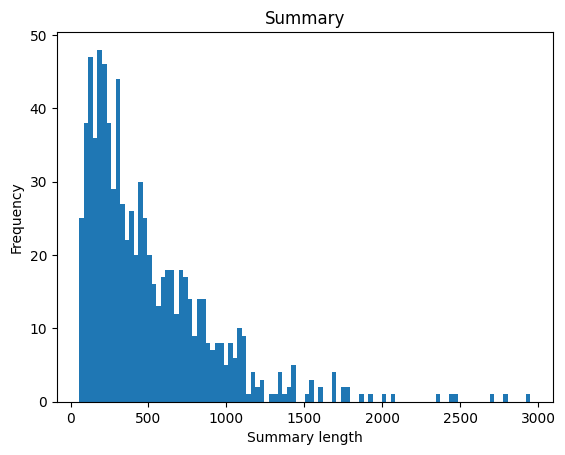


	test
Null Values:
id          0
dialogue    0
summary     0
dtype: int64

Statistics:

count     819.000000
mean      521.598291
std       409.387325
min        49.000000
25%       226.000000
50%       403.000000
75%       687.500000
max      2793.000000
Name: dialogue, dtype: float64 

count    819.000000
mean     108.780220
std       58.461389
min       17.000000
25%       63.000000
50%       96.000000
75%      142.000000
max      300.000000
Name: summary, dtype: float64


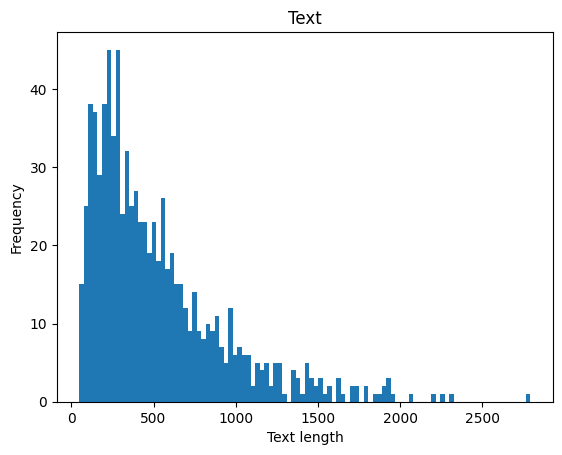

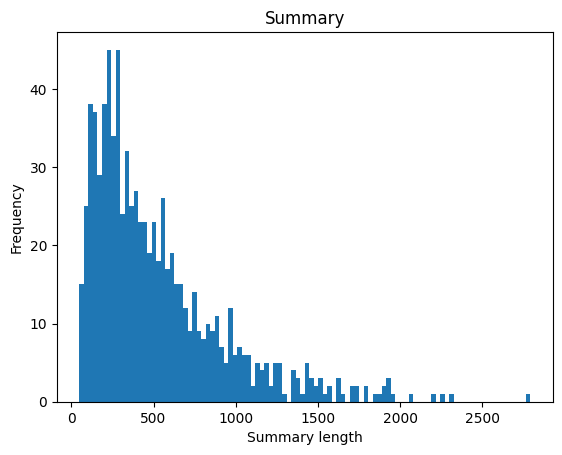

In [17]:
#SAMSUM dataset
dat = load_dataset("samsum")
output_dir = '/content/drive/MyDrive/processed_data1'
splits = ['train', 'validation', 'test']
attr = ['dialogue', 'summary']

os.makedirs(output_dir, exist_ok=True)
preprocess_data(dat, output_dir, splits, attr)


	train
Null Values:
id          0
dialogue    0
summary     0
topic       0
dtype: int64

Statistics:

count    12460.000000
mean       738.281300
std        396.544752
min        190.000000
25%        485.000000
50%        653.000000
75%        916.000000
max       5178.000000
Name: dialogue, dtype: float64 

count    12460.000000
mean       140.733547
std         65.133972
min         31.000000
25%         95.000000
50%        129.000000
75%        173.000000
max       1039.000000
Name: summary, dtype: float64


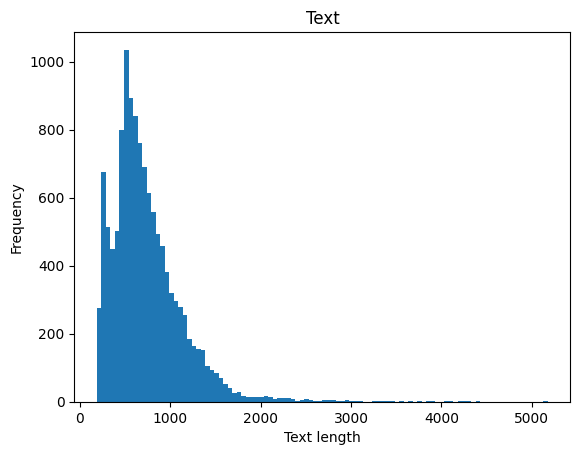

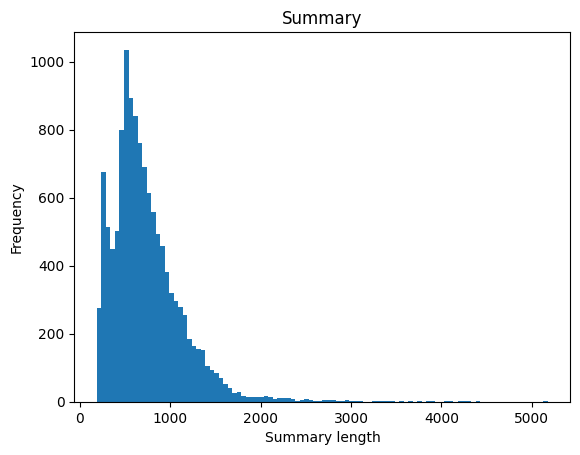


	validation
Null Values:
id          0
dialogue    0
summary     0
topic       0
dtype: int64

Statistics:

count     500.000000
mean      727.386000
std       366.971931
min       211.000000
25%       477.000000
50%       642.500000
75%       912.500000
max      2563.000000
Name: dialogue, dtype: float64 

count    500.000000
mean     129.952000
std       59.074438
min       33.000000
25%       86.750000
50%      117.000000
75%      158.500000
max      398.000000
Name: summary, dtype: float64


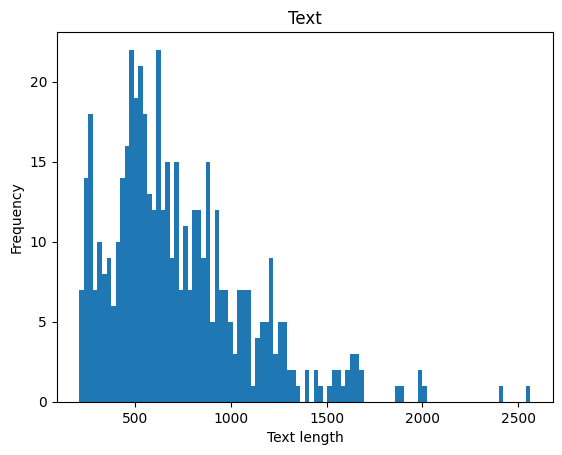

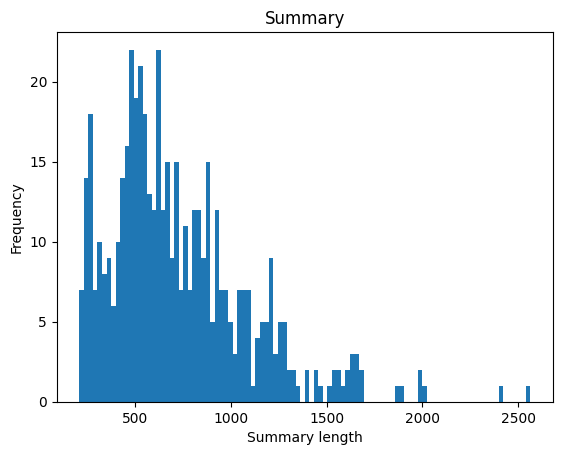


	test
Null Values:
id          0
dialogue    0
summary     0
topic       0
dtype: int64

Statistics:

count    1500.000000
mean      757.324000
std       424.975239
min       209.000000
25%       472.750000
50%       668.000000
75%       956.000000
max      4430.000000
Name: dialogue, dtype: float64 

count    1500.000000
mean      114.521333
std        50.470239
min        27.000000
25%        79.000000
50%       105.000000
75%       140.000000
max       467.000000
Name: summary, dtype: float64


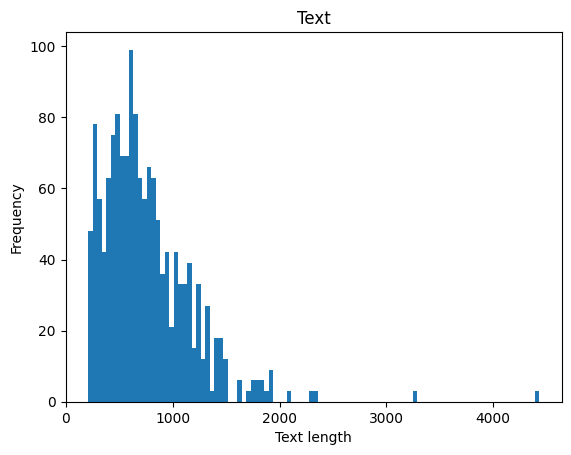

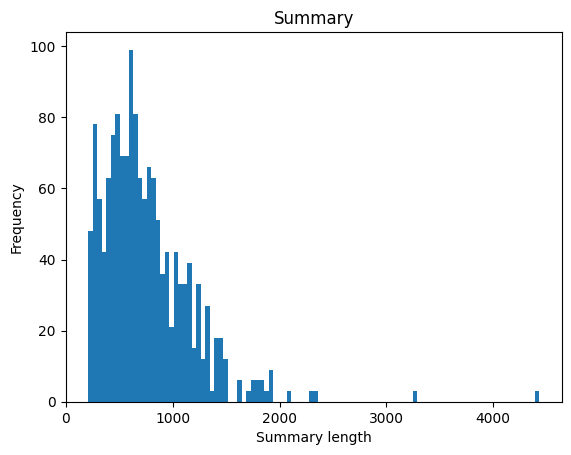

In [18]:
dat = load_dataset("knkarthick/dialogsum")
output_dir = '/content/drive/MyDrive/processed_data2'
splits = ['train', 'validation', 'test']
attr = ['dialogue', 'summary']
os.makedirs(output_dir, exist_ok=True)
preprocess_data(dat, output_dir, splits, attr)

In [23]:
# Load
samsum_df = pd.read_csv('/content/drive/MyDrive/processed_data1/train.csv') #samsum summary
dialogue_df = pd.read_csv('/content/drive/MyDrive/processed_data2/train.csv') #dialogue summary

# Rename
samsum_df.rename(columns={'dialogue': 'text'}, inplace=True)
dialogue_df.rename(columns={'dialogue': 'text'}, inplace=True)
dialogue_df.drop(['topic', 'id'], axis=1, inplace=True)

# Concatenate
merged_df = pd.concat([samsum_df, dialogue_df], ignore_index=True)

merged_df['text'].fillna('', inplace=True)
merged_df['summary'].fillna('', inplace=True)

print(merged_df['text'].apply(len).describe(), '\n')
print(merged_df['summary'].apply(len).describe())

count    27192.000000
mean       615.244999
std        415.543855
min          0.000000
25%        305.000000
50%        540.000000
75%        814.000000
max       5492.000000
Name: text, dtype: float64 

count    27192.000000
mean       124.155781
std         64.692599
min          3.000000
25%         76.000000
50%        112.000000
75%        159.000000
max       1039.000000
Name: summary, dtype: float64


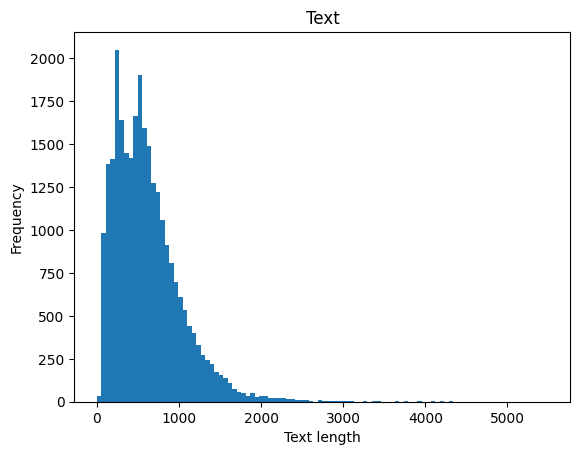

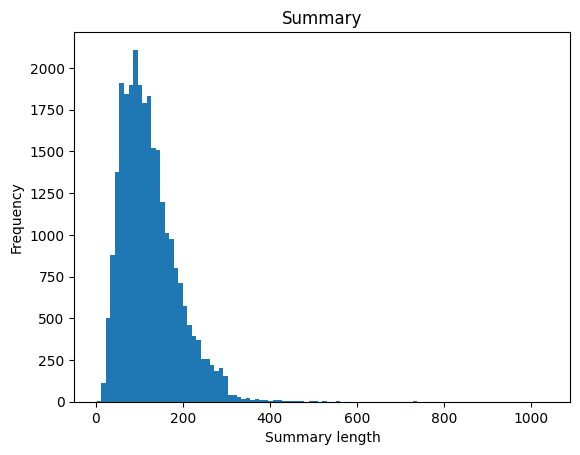

In [24]:
#Histogram
plt.hist(merged_df['text'].apply(len), bins=100)
plt.xlabel("Text length")
plt.ylabel("Frequency")
plt.title("Text")
plt.show()

plt.hist(merged_df['summary'].apply(len), bins=100)
plt.xlabel("Summary length")
plt.ylabel("Frequency")
plt.title("Summary")
plt.show()

In [26]:
import os
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords and lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to string
    text = ' '.join(tokens)

    return text


# Apply cleaning function to both text and summary columns
merged_df['text'] = merged_df['text'].apply(clean_text)
merged_df['summary'] = merged_df['summary'].apply(clean_text)

merged_df.to_csv('/content/drive/MyDrive/data.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


         id                                               text  \
0  13818513  amanda baked cooky want jerry sure amanda ill ...   
1  13728867  olivia voting election oliver liberal always o...   
2  13681000  tim hi whats kim bad mood tbh going lot stuff ...   
3  13730747  edward rachel think im ove bella rachel dont s...   
4  13728094  sam hey overheard rick say something sam dont ...   

                                             summary  
0            amanda baked cooky bring jerry tomorrow  
1             olivia olivier voting liberal election  
2  kim may try pomodoro technique recommended tim...  
3  edward think love bella rachel want edward ope...  
4  sam confused overheard rick complaining roomma...   

count    27192.000000
mean       376.641586
std        251.860155
min          0.000000
25%        190.000000
50%        330.000000
75%        496.250000
max       2810.000000
Name: text, dtype: float64 

count    27192.000000
mean        82.862570
std         43.924925


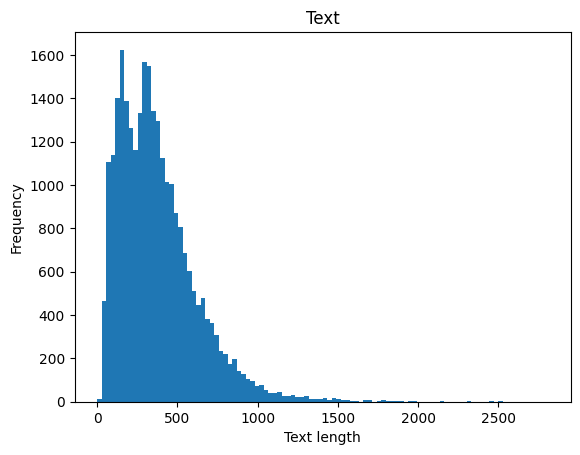

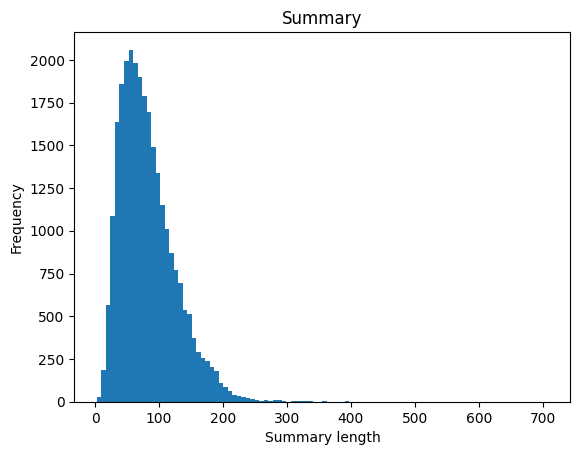

In [27]:
print(merged_df.head() , '\n')

print(merged_df['text'].apply(len).describe(), '\n')
print(merged_df['summary'].apply(len).describe())

#Histogram
plt.hist(merged_df['text'].apply(len), bins=100)
plt.xlabel("Text length")
plt.ylabel("Frequency")
plt.title("Text")
plt.show()

plt.hist(merged_df['summary'].apply(len), bins=100)
plt.xlabel("Summary length")
plt.ylabel("Frequency")
plt.title("Summary")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

output_dir = '/content/drive/MyDrive/'

df = pd.read_csv('/content/drive/MyDrive/data.csv')

# Split the dataset into train, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Save
train_df.to_csv(f"{output_dir}/train.csv", index=False)
val_df.to_csv(f"{output_dir}/validation.csv", index=False)
test_df.to_csv(f"{output_dir}/test.csv", index=False)
